# Statistics Canada Analysis

## Summary

1-2 sentences description of analysis

## Introduction

Intro 

- Background info relating to the topic 
- Narrowing down of variables will be justified here
- Will use 3 references: Definitions of certain term(s), background info or inspiration for the study, narrowing down of variables due to prior research (hopefully from a peer reviewed article).

### Research Question

- Explicitly stated research question

#### Dataset Description

(Based on Overview and Scope of Coverage Sections)
- cites the pdf provided with the dataset

#### Description of Relevent Variables

(Based on "Variables Description" provided in the PDF)

- cites the pdf provided with the dataset

## Methods and Results

### Description of Methods

- 
-
-
-
-
-
-
-

### Preliminary Analysis

#### Loading the Data

In [1]:
# Importing the appropriate packages
import pandas as pd
import sklearn as sk
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# import os

In [2]:
# Loading the data
data = pd.read_csv('data/CIS-72M0003-E-2017-Annual/CIS-72M0003-E-2017-Annual_F1.csv')
data.head()

,YEAR,PUMFID,PERSONID,FWEIGHT,PROV,USZGAP,MBMREGP,AGEGP,SEX,MARST,...,DWLTYP,DWTENR,REPA,SUIT,MORTG,MORTGM,CONDMP,RENTM,CHNEED,VERDATE
0,2017,2129,212901,NaN,24,8,18,4,2,6,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
1,2017,2129,212902,NaN,24,8,18,4,1,6,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
2,2017,2129,212903,NaN,24,8,18,10,2,2,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
3,2017,2129,212904,NaN,24,8,18,10,1,2,...,1,1,3,1,2,99999996,99999996,99999996,2,02JUL2019
4,2017,2130,213001,NaN,12,5,7,16,1,1,...,1,1,2,1,2,99999996,99999996,99999996,6,02JUL2019


#### Cleaning and Wrangling

**The data is reduced to some specific features and targets of interest before EDA as it is difficult to analyze 194 features.**

In [3]:
reduced_data = data[['EFSIZE', 'USHRWK', 'ATINC', 'HLEV2G', 'EFINVA', 'EFMJIE', 'EFATINC', 'EFMJSI']]
reduced_data

,EFSIZE,USHRWK,ATINC,HLEV2G,EFINVA,EFMJIE,EFATINC,EFMJSI
0,4,NaN,12075,1,375,2,132440,3
1,4,NaN,10530,1,375,2,132440,3
2,4,NaN,6250,2,375,2,132440,3
3,4,NaN,103585,2,375,1,132440,3
4,2,NaN,69570,3,850,1,71815,6
...,...,...,...,...,...,...,...,...
92287,7,NaN,99999996,6,0,2,53300,4
92288,7,NaN,99999996,6,0,2,53300,4
92289,7,NaN,99999996,6,0,2,53300,4
92290,2,NaN,35255,3,0,1,51685,3


In [4]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92292 entries, 0 to 92291
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EFSIZE   92292 non-null  int64  
 1   USHRWK   0 non-null      float64
 2   ATINC    92292 non-null  int64  
 3   HLEV2G   92292 non-null  int64  
 4   EFINVA   92292 non-null  int64  
 5   EFMJIE   92292 non-null  int64  
 6   EFATINC  92292 non-null  int64  
 7   EFMJSI   92292 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.6 MB


- **The types are all numeric, but this does not mean the data are all numeric. When referring to the data set description, EFMJIE, EFMJSI, and HLEV2G are categorical variables with numbers corresponding to categories**
- **The USHRWK column has zero valid values as all are NaN. This is not an error as these were the values in the description of the dataset as well**


In [5]:
reduced_data.describe()

,EFSIZE,USHRWK,ATINC,HLEV2G,EFINVA,EFMJIE,EFATINC,EFMJSI
count,92292.000000,0.0,9.229200e+04,92292.000000,92292.000000,92292.000000,9.229200e+04,92292.000000
mean,2.958848,NaN,1.836557e+07,3.340268,5722.896351,1.553439,8.712786e+04,2.861949
std,1.451516,NaN,3.867862e+07,1.711394,29041.941551,0.497139,5.858689e+04,1.337363
min,1.000000,NaN,-7.039500e+04,1.000000,-64000.000000,1.000000,-3.985000e+04,2.000000
25%,2.000000,NaN,2.102375e+04,2.000000,0.000000,1.000000,4.749000e+04,2.000000
50%,3.000000,NaN,4.114750e+04,3.000000,0.000000,2.000000,7.629000e+04,2.000000
75%,4.000000,NaN,8.203625e+04,4.000000,400.000000,2.000000,1.134400e+05,4.000000
max,7.000000,NaN,1.000000e+08,9.000000,960000.000000,2.000000,1.128860e+06,7.000000


**The above summaries indicate no missing data for the columns except USHRWK (all non-null counts at 92292 which is in line with the number of total observations in the data). However, when referring to the dataset description, the ATINC column contains the value 99999996 for observations that were skipped for the information for valid reasons. Therefore, these observations should be removed**

In [6]:
reduced_data = reduced_data.drop(columns = 'USHRWK')

In [7]:
reduced_data = reduced_data.loc[reduced_data['ATINC'] != 99999996]
reduced_data

,EFSIZE,ATINC,HLEV2G,EFINVA,EFMJIE,EFATINC,EFMJSI
0,4,12075,1,375,2,132440,3
1,4,10530,1,375,2,132440,3
2,4,6250,2,375,2,132440,3
3,4,103585,2,375,1,132440,3
4,2,69570,3,850,1,71815,6
...,...,...,...,...,...,...,...
92282,2,29540,1,1725,1,42235,4
92283,7,51000,1,0,1,53300,4
92284,7,2300,1,0,2,53300,4
92290,2,35255,3,0,1,51685,3


array([[<AxesSubplot:title={'center':'EFSIZE'}>,
        <AxesSubplot:title={'center':'ATINC'}>,
        <AxesSubplot:title={'center':'HLEV2G'}>],
       [<AxesSubplot:title={'center':'EFINVA'}>,
        <AxesSubplot:title={'center':'EFMJIE'}>,
        <AxesSubplot:title={'center':'EFATINC'}>],
       [<AxesSubplot:title={'center':'EFMJSI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

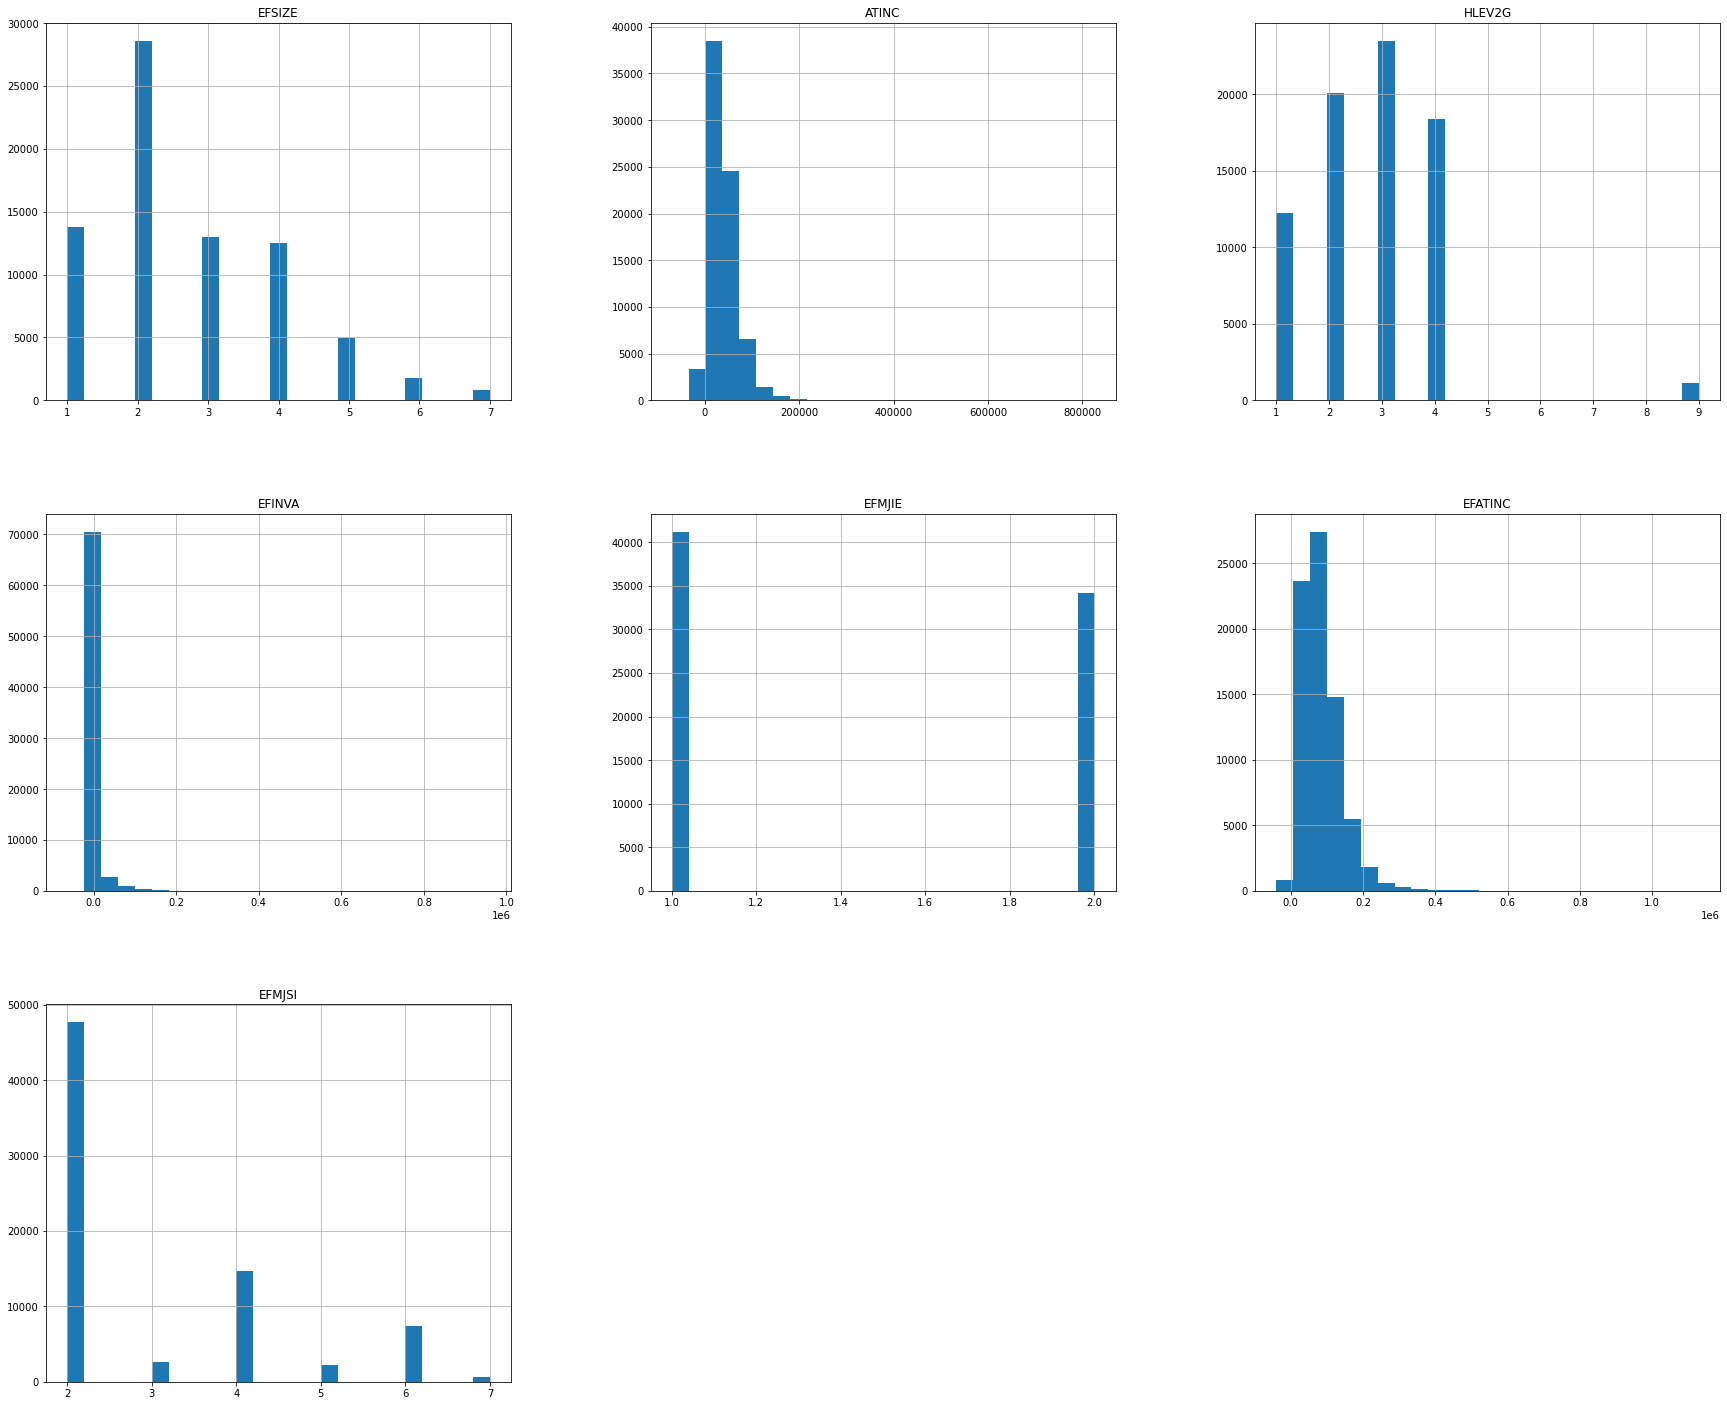

In [8]:
reduced_data.hist(bins=25, figsize=(30,25))

<AxesSubplot:>

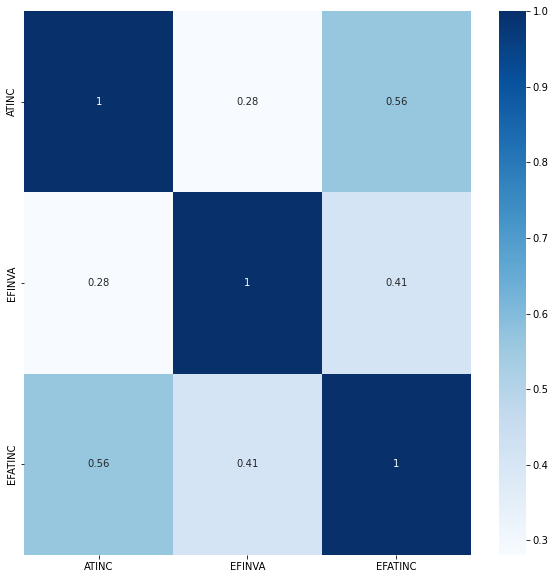

In [10]:
plt.figure(figsize=(10,10))
correlations = reduced_data.iloc[:,[1,3,5]].corr()
sns.heatmap(correlations, cmap=plt.cm.Blues, annot=True)

#### Visualisations

### Training the Model

### Testing

## Discussion of Results

## References